<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-1/blob/main/Question1/Implementation_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise Description:**

You are tired of paying exorbitant health insurance premiums every year. Your
goal is to train a machine learning model that can accurately predict health
insurance prices for individuals based on attributes such as age, sex, region,
etc. You can use this dataset to train your model.

**(a)** Use statistical methods and graphs/plots to describe your daataset.

**(b)** Split your dataset into train and test sets with a 7:3 ratio. Use the
train_test_split tool from scikit-learn.

**(c)** Build and train a Linear Regression model using scikit-learn. Explore the
parameters of the model in scikit-learn, and aim for higher accuracies.

**(d)** Evaluate the performance of your model on both the train and test sets
(separately). You can use scikit-learn’s mean squared error tool.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import mean_squared_error

sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

In [87]:
#read cvs file into dataframe -final-data
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question1/Health_Insurance_Dataset.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  1
Number of rows with NaNs is:  0


In [90]:
 #give unique number to unique string in every object column
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])


df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [91]:
Xs = StandardScaler().fit_transform(df)
Xcols = df.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,0.438495,-0.785908
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,0.438495,-0.415500
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,-0.466915,-0.494728
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,-1.372326,-0.567017
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,-0.466915,1.293027


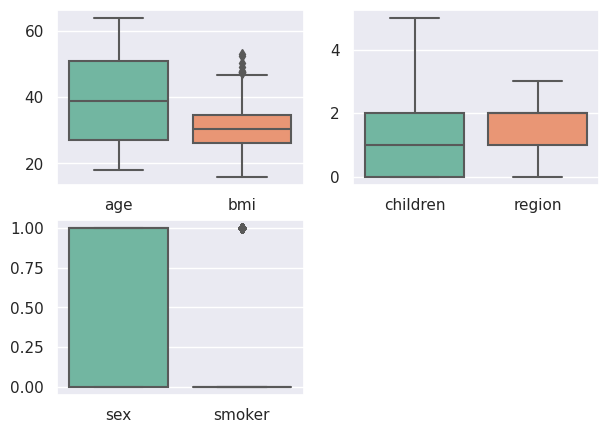

In [92]:
plt.subplot(2, 2, 1)
ax = sns.boxplot(data=df[['age', 'bmi']], orient="v", palette="Set2")

plt.subplot(2, 2, 2)
ax = sns.boxplot(data=df[['children','region']], orient="v", palette="Set2")

plt.subplot(2, 2, 3)
ax = sns.boxplot(data=df[['sex','smoker']], orient="v", palette="Set2")

In [113]:
X = df[['age', 'sex','bmi','children','smoker','region']]
y = df[['charges']]

# **Correlation**

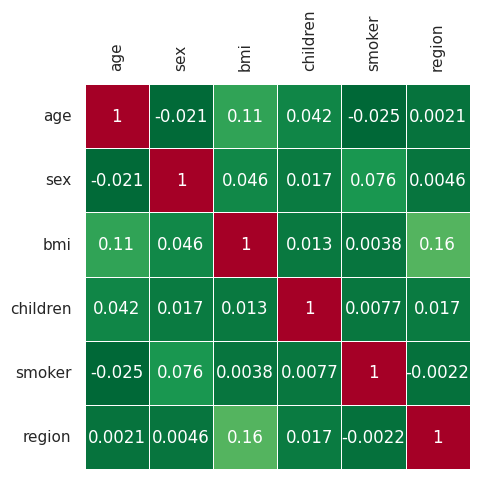

In [114]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

# **Split the dataset**

In [94]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X,y, test_size=0.3)

# **Build and train a Linear Regression model**

In [111]:
linear_model = sklearn.linear_model.LinearRegression()
training = linear_model.fit(X_train,y_train)

In [110]:
acc_training = linear_model.score(X_train, y_train)
print(f'{round((1-acc_training)*100,2)}% training error')

25.24% training error


In [112]:
predictions = linear_model.predict(X_test)
mean_square_error = mean_squared_error(y_test, predictions)

print(f'The mean square error of test is: ', {mean_square_error})

acc_test = linear_model.score(X_test, y_test)
print(f'{round((1-acc_test)*100,2)}% test error')

The mean square error of test is:  {34233126.88995486}
24.27% test error
